In [203]:
# importing libraries and data

import matplotlib
import pandas as pd
import seaborn as sns
from datetime import date

data = pd.read_csv("us-states.csv")
data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


C:\Users\olina\AppData\Local\Temp/ipykernel_8016/321109035.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  state_case.set_xticklabels(state_case.get_xticklabels(), rotation = 80, ha = "right")


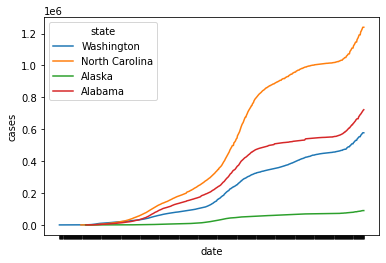

In [198]:
# takes a list of state names and plots their cumulative cases vs state by date
def plot_state_to_cases(state_names):
    # simplify dataset
    df = data.drop(['fips','deaths'], axis=1)

    # include only states given in parameter
    df = df[df['state'].isin(state_names)]

    # plot data into line graph with different states being different colors
    state_case = sns.lineplot(data=df, x='date', y='cases', hue='state')

    # rotate x axis tick labels to obtain better visualization
    state_case.set_xticklabels(state_case.get_xticklabels(), rotation = 80, ha = "right")

#testing function
plot_state_to_cases(['Alabama', 'Alaska', 'Washington', 'North Carolina'])

In [208]:
#  takes the name of a state and returns the date of its highest number of new cases
def highest_case_date(state):
    df = data[data["state"] == state]
    state_cases = df['cases']

    #find max number of cases
    case_number = state_cases.max()

    # obtain date of max case number
    date = df[df['cases'] == case_number]['date']

    # return only one date if multiple days have the highest number of cases
    return date.iloc[0]

# testing function
print(highest_case_date('Alabama'))
print(highest_case_date('Alaska'))
print(highest_case_date('Arizona'))

2021-09-05
2021-09-03
2021-09-05
2021-09-03
2021-09-05


In [213]:
# takes the names of two states and reports which one had its highest number of cases first
# and how many days separate that one's peak from the other one's peak
def state_comparison(state_1, state_2):
    # obtaining list containing year, month, day of date
    state_1_date = highest_case_date(state_1).split("-")
    state_2_date = highest_case_date(state_2).split("-")

    # converting date to datetime.date format
    date_1 = date(int(state_1_date[0]), int(state_1_date[1]), int(state_1_date[2]))
    date_2 = date(int(state_2_date[0]), int(state_2_date[1]), int(state_2_date[2]))
    #compare dates
    if(date_1 < date_2):
        difference = date_2 - date_1
        print(state_1 + ' had its highest number of cases', difference.days, 'days before ' + state_2)
    elif(date_1 > date_2):
        difference = date_1 - date_2
        print(state_2 + ' had its highest number of cases', difference.days, 'days before ' + state_1)
    else:
        print('Both', state_1, 'and', state_2, 'had their highest number of cases on', date_1)

# testing function
state_comparison('Connecticut', 'Colorado')
state_comparison('Alabama', 'Colorado')
state_comparison('Alabama', 'North Carolina') 

Connecticut had its highest number of cases 2 days before Colorado
Both Alabama and Colorado had their highest number of cases on 2021-09-05
North Carolina had its highest number of cases 1 days before Alabama
